# Численные методы, лабораторная работа №3
*****
### Дума Э.Г. 302-И (ПМиИ-б-о-182)
*****
## Интерполяционный многочлен Эрмита
*****
### Задание №1 ###
*****  
#### Объясните, какой системе условий должен удовлетворять каждый из четырёх многочленов 3-ей степени при данных f(0),f(1),f ′(0),f ′(1). Как можно непосредственно из этой системы условий найти коэффициенты этих многочленов?
#### Если $x \in [a, b]$, тогда $\displaystyle k=\frac{x−a}{b−a}=\frac{x−a}{h}$.

#### $H_3(x) = p_{00}(k)f(a) + p_{01}(k)f(b) + p_{01}{k}f'(a) + p_{11}(k)f'(b)$
#### $p_{ij}(k) = a_0 + a_1 k + a_2 k^2 + a_3 k^3$
#### $p_{ij}'(k) = a_1 + 2a_2 k + 3a_3 k^2$
#### $H_3 (0) = f(0), H_3(1) = f(1), H_3'(0) = f'(0), H_3'(1) = f'(1)$

#### Методом неопределенных коэффицентов получаем следующие системы:

#### $p_{00}(k): \begin{cases} 
a_0 = 1\\
a_1 = 0\\
a_0 + a_1 + a_2 + a_3 = 0\\
a_1 + 2a_2 + 3a_3 = 0
\end{cases}
$

#### $p_{01}(k): \begin{cases} 
a_0 = 0\\
a_1 = 0\\
a_0 + a_1 + a_2 + a_3 = 1\\
a_1 + 2a_2 + 3a_3 = 0
\end{cases}
$

#### $p_{10}(k): \begin{cases} 
a_0 = 0\\
a_1 = 1\\
a_0 + a_1 + a_2 + a_3 = 0\\
a_1 + 2a_2 + 3a_3 = 0
\end{cases}
$

#### $p_{11}(k): \begin{cases} 
a_0 = 0\\
a_1 = 0\\
a_0 + a_1 + a_2 + a_3 = 0\\
a_1 + 2a_2 + 3a_3 = 1
\end{cases}
$

#### Решим их при помощи метода Гаусса, но для начала подключим вспомогательные библиотеки:

In [1]:
import numpy as np
import matplotlib.pyplot as plt

##### Создадим список $left$, который будет хранить в себе матрицу значений с лева, так как во всех 4-х функциях у нас данное значение одинаковое то мы объявим его 1 раз и будем использовать в дальнейшем:

In [7]:
left = np.array([[1, 0, 0, 0], [0, 1, 0, 0], [1, 1, 1, 1], [0, 1, 2, 3]])

##### Решим систему $p_{00}(k)$:

In [8]:
right = np.array([1, 0, 0, 0])
np.linalg.solve(left, right)

array([ 1.,  0., -3.,  2.])

##### Следует, что $p_{00}(k) = 1 - 3k^2 + 2k^3$.
##### Решим систему $p_{01}(k)$:

In [9]:
right = np.array([0, 0, 1, 0])
np.linalg.solve(left, right)

array([ 0.,  0.,  3., -2.])

##### Следует, что $p_{01}(k) = 3k^2 - 2k^3$.
##### Решим систему $p_{10}(k)$:

In [10]:
right = np.array([0, 1, 0, 0])
np.linalg.solve(left, right)

array([ 0.,  1., -2.,  1.])

##### Следует, что $p_{10}(k) = k - 2k^2 +k^3$.
##### Решим систему $p_{11}(k)$:

In [11]:
right = np.array([0, 0, 0, 1])
np.linalg.solve(left, right)

array([ 0.,  0., -1.,  1.])

##### Следует, что $p_{11}(k) = -k^2 + k^3$.
##### $h = b - a = 1$
##### Итог:
##### $H_3(x)=(1−3k^2+2k^3)f(a)+(3k^2−2k^3)f(b)+(k−2k^2+k^3)f'(a)+(−k^2+k^3)f'(b)$
*****
### Задание №2 ###
***** 
#### 1). Выбрать на плоскости 2 произвольные точки в качестве узлов и показать, как влияют значения производных в этих точках на поведение многочлена.

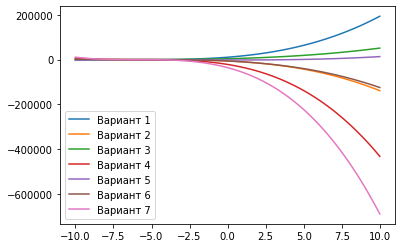

In [16]:
xA = 20 * np.random.random() - 10
yA = 20 * np.random.random() - 10
xB = 20 * np.random.random() - 10
yB = 20 * np.random.random() - 10

def h(x, yADif, yBDif):
  k = x - xA
  return (1 - 3 * k**2 + 2 * k**3) * yA + (3 * k**2 - 2 * k**3) * yB + (k - 2 * k**2 + k**3) * yADif + (-1 * k**2 + k**3) * yBDif

for i in range(1, 8):
  yADif = 200 * np.random.random() - 100
  yBDif = 200 * np.random.random() - 100
  xSpace = np.linspace(-10, 10, 100)
  ySpace = [h(x, yADif, yBDif) for x in xSpace]
  plt.plot(xSpace, ySpace, label=f'Вариант {i}')
plt.legend()
plt.show()

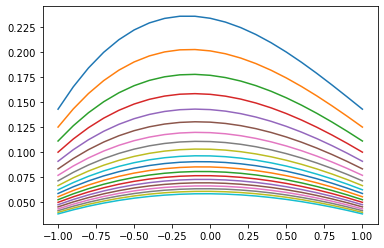

In [17]:
def f(x):
  global d
  return 1 / (1 + d * x ** 2)

def fDif(x):
  global d
  return -2 * d * x / (1 + d * x) ** 2

def y(x):
   k = (x + 1) / 2
   return  (1 - 3 * k**2 + 2 * k**3) * f(-1) + (3 * k**2 - 2 * k**3) * f(1) + (k - 2 * k**2 + k**3) * fDif(-1) + (-1 * k**2 + k**3) * fDif(1)


for K in range(1, 21):
  d = 5 + K
  xSpace = np.linspace(-1, 1, 21)
  ySpace = [y(x) for x in xSpace]
  plt.plot(xSpace, ySpace)
plt.show()

*****